<a href="https://colab.research.google.com/github/RaiahMohamedAmine/BBC-Articles-Classification/blob/master/BBC_Articles_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Exercise%20-%20Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2020-07-10 11:54:50--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.04s   

2020-07-10 11:54:50 (108 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [104]:
vocab_size = 4000
embedding_dim = 15
max_length = 2000
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_portion = .8

In [105]:
sentences = []
labels = []
stopwords = [ "a", "s" ,"said","e","ve" ,"us" , "two", "three", "must","m" , "up" ,"eu" ,"ms" ,"on" ,"six" ,"in" ,"uk" ,"that","re" ,"o" ,"it" , "bt" ,"will" , "not","mr" ,"year" ,"also", "us" ,"can" ,"t" , "uk", "no" , "let","co"  ,   "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))
# Expected Output
# 186

186


In [106]:
from string import digits
remove_digits = str.maketrans('','',digits)

with open("/tmp/bbc-text.csv", 'r') as csvfile:
    next(csvfile)
    for row in csvfile :
        row = row.translate(remove_digits)
        for stopword in stopwords :
          row= row.replace(" " +stopword + " ", " ")
        row = row.split(',')
        labels.append(row[0])
        sentences.append(row[1])

    
print(len(labels))
print(len(sentences))
print(sentences[0])
# Expected Output
# 2225
# 2225
# tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite companies worried means terms advertising revenues well  brand identity  viewer loyalty channels. although us leads technology moment  also concern raised europe  particularly growing uptake services like sky+.  happens today  will see nine months years  time uk   adam hume  bbc broadcast s futurologist told bbc news website. likes bbc  no issues lost advertising revenue yet. pressing issue moment commercial uk broadcasters  brand loyalty important everyone.  will talking content brands rather network brands   said tim hanlon  brand communications firm starcom mediavest.  reality broadband connections  anybody can producer content.  added:  challenge now hard promote programme much choice.   means  said stacey jolna  senior vice president tv guide tv group  way people find content want watch simplified tv viewers. means networks  us terms  channels take leaf google s book search engine future  instead scheduler help people find want watch. kind channel model might work younger ipod generation used taking control gadgets play them. might not suit everyone  panel recognised. older generations comfortable familiar schedules channel brands know getting. perhaps not want much choice put hands  mr hanlon suggested.  end  kids just diapers pushing buttons already - everything possible available   said mr hanlon.  ultimately  consumer will tell market want.   50 000 new gadgets technologies showcased ces  many enhancing tv-watching experience. high-definition tv sets everywhere many new models lcd (liquid crystal display) tvs launched dvr capability built  instead external boxes. one example launched show humax s 26-inch lcd tv 80-hour tivo dvr dvd recorder. one us s biggest satellite tv companies  directtv  even launched branded dvr show 100-hours recording capability  instant replay  search function. set can pause rewind tv 90 hours. microsoft chief bill gates announced pre-show keynote speech partnership tivo  called tivotogo  means people can play recorded programmes windows pcs mobile devices. reflect increasing trend freeing multimedia people can watch want  want.

2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes. leading trend  programmes content delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like tivo sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. built-in high-definition tv sets  big business japan  slower take off europe lack high-definition programming. people forward wind adverts  forget abiding network channel schedules  putting together a-la-carte entertainment. networks cable satellite companies worried mea

In [107]:
train_size = int(len(sentences)*training_portion)

train_sentences = sentences[0:train_size]
train_labels = labels[0:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

# Expected output (if training_portion=.8)
# 1780
# 1780
# 1780
# 445
# 445

1780
1780
1780
445
445


In [108]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences,maxlen=max_length, padding=padding_type,truncating=trunc_type)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

# Expected Ouput
# 449
# 120
# 200
# 120
# 192
# 120

404
2000
176
2000
177
2000


In [109]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

# Expected output
# 445
# (445, 120)

445
(445, 2000)


In [110]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
print(label_tokenizer.word_index)
training_label_seq = label_tokenizer.texts_to_sequences(train_labels)
validation_label_seq = label_tokenizer.texts_to_sequences(validation_labels)

training_label_seq=np.array(training_label_seq)
validation_label_seq= np.array(validation_label_seq)

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

# Expected output
# [5]
# [2]
# [1]
# (1780, 1)
# [4]
# [5]
# [3]
# (445, 1)

{'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}
[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [111]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64,activation='relu'),
  tf.keras.layers.Dense(6,activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

# Expected Output
# Layer (type)                 Output Shape              Param #   
# =================================================================
# embedding (Embedding)        (None, 120, 16)           16000     
# _________________________________________________________________
# global_average_pooling1d (Gl (None, 16)                0         
# _________________________________________________________________
# dense (Dense)                (None, 24)                408       
# _________________________________________________________________
# dense_1 (Dense)              (None, 6)                 150       
# =================================================================
# Total params: 16,558
# Trainable params: 16,558
# Non-trainable params: 0

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 2000, 15)          60000     
_________________________________________________________________
flatten_12 (Flatten)         (None, 30000)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                1920064   
_________________________________________________________________
dense_25 (Dense)             (None, 6)                 390       
Total params: 1,980,454
Trainable params: 1,980,454
Non-trainable params: 0
_________________________________________________________________


In [112]:
num_epochs = 30
history = model.fit(
    train_padded,
    training_label_seq,
    epochs=num_epochs,
    validation_data=(validation_padded,validation_label_seq)
)

Epoch 1/30
56/56 [==============================] - 1s 13ms/step - loss: 1.6103 - accuracy: 0.2646 - val_loss: 1.4621 - val_accuracy: 0.4157
Epoch 2/30
56/56 [==============================] - 1s 11ms/step - loss: 1.1093 - accuracy: 0.6247 - val_loss: 0.7813 - val_accuracy: 0.8539
Epoch 3/30
56/56 [==============================] - 1s 10ms/step - loss: 0.4092 - accuracy: 0.9478 - val_loss: 0.3290 - val_accuracy: 0.9258
Epoch 4/30
56/56 [==============================] - 1s 10ms/step - loss: 0.1248 - accuracy: 0.9871 - val_loss: 0.1987 - val_accuracy: 0.9506
Epoch 5/30
56/56 [==============================] - 1s 10ms/step - loss: 0.0464 - accuracy: 0.9989 - val_loss: 0.1536 - val_accuracy: 0.9573
Epoch 6/30
56/56 [==============================] - 1s 11ms/step - loss: 0.0221 - accuracy: 0.9994 - val_loss: 0.1338 - val_accuracy: 0.9573
Epoch 7/30
56/56 [==============================] - 1s 11ms/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.1317 - val_accuracy: 0.9596
Epoch 8/30
56

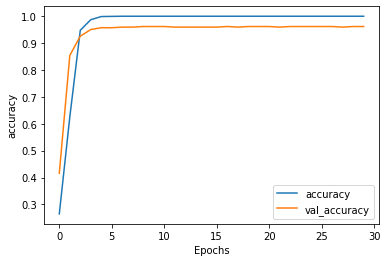

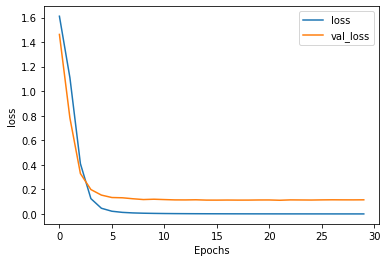

In [113]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [114]:
predict_sentences = [" They are scheduled to play the first of their eight “seeding” games on July 30 (against the Los Angeles Clippers, another championship contender) before the playoffs start in mid-August.",
                     "“Active reading” involves focused reading techniques to get the most learning potential possible out of every article.When reading business English articles, it’s a good idea to read the article twice.The first time you read an article, read it for a general understanding. Circle any of the words you don’t know. When you get to the end of the article, look up the words you don’t know in an English dictionary and write down their meanings in your notebook.Then, read the article again. This time you should be able to understand more.If you can, find a friend, colleague or teacher who’s willing to read the article too. After you both read the article, discuss it. Was there anything you found really interesting? Did you learn something new or surprising? Was there an idiom or phrase that you saw for the first time? Discussing what you read is a great way to check your understanding of the article and to practice speaking English.Finally, supercharge your reading practice by supplementing it with the authentic business videos on FluentU. FluentU provides real English dialogues, business news reports, interviews with entrepreneurs and more. There are thousands of videos, including a whole category just for business-focused videos.",
                     "German sports car maker Porsche has declared that it would no longer produce diesel cars, but instead concentrate on petrol-powered , electric and hybrid vehicles. It is the first German automaker to completely withdraw from the diesel car sector.The company made the decision in the aftermath of the emission cheating scandal that hit Porsche's parent company Volkswagen . In an interview, Porsche's CEO Oliver Blume said that Porsche's image had suffered due to the  scandal.",
                     "The website can be edited by everyone. Currently, about 80,000 volunteers around the world write articles for it. They are constantly monitored by hundreds of editors who replace information if it is wrong. In the early days of the encyclopaedia users had their doubts about using Wikipedia, because many mistakes were found and some experts claimed it was not serious enough.The Wikimedia Foundation runs the encyclopaedia. It also raises money to pay its administrators and a staff of about 400 employees.  With the money it gets it can also keep Wikipedia free from advertisements. The foundation has announced that it wants to raise 100 million dollars over the  next decade to keep Wikipedia running",
                     "SpaceX, a private American aerospace company, has successfully landed a rocket on the landing pad at Cape Canaveral , Florida. The Falcon 9 rocket landed in an upright position after three previous attempts had failed . The SpaceX rocket landing is a big step forward for future space missions. Up to now the first stages of a rocket fell back to earth and couldn't be used again. Reusable rockets that can bring people into orbit or to a space station would strongly reduce the cost of space missions. It would also allow spacecraft to be launched more often. A single Falcon 9 rocket costs about 70 million dollars, while fuel per launch only costs about 200,000 dollars",
                     "The World Wide Web has become 25 years old. In 1989 a British scientist, Tim Berners-Lee tried to find a way to get computers around the world to communicate with each other. At first, Berners-Lee wanted to give scientists and researchers a way to share their information. He came up with a concept that could connect documents: the World Wide Web was born. It was an invention that revolutionized our world the way no other one has. Lee’s first computer, from which he accessed others, is still on display in London."]
predict_sequences = tokenizer.texts_to_sequences(predict_sentences)
predict_padded = pad_sequences(predict_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)
print(label_tokenizer.word_index)
print("\n\n")

prediction = model.predict(predict_padded)
print(np.around(prediction, decimals=1))

{'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}



[[0.  1.  0.  0.  0.  0. ]
 [0.  0.1 0.  0.  0.9 0. ]
 [0.  0.5 0.4 0.  0.  0.1]
 [0.  0.7 0.1 0.  0.2 0.1]
 [0.  0.2 0.5 0.  0.1 0.2]
 [0.  0.8 0.  0.  0.1 0. ]]


In [115]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [116]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

# Expected output
# (1000, 16)

(4000, 15)


In [121]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
index = min(len(reverse_word_index),vocab_size)

for word_num in range(1, index):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')